In [10]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [11]:
cd My Drive/PyTorch_learnings

/gdrive/My Drive/PyTorch_learnings


In [12]:
ls

 Analytics_Vidhya/  'Deep Learning With PyTorch - Book'/   Yolov5/
 BERT/               PadhAI/


In [13]:
cd Yolov5

/gdrive/My Drive/PyTorch_learnings/Yolov5


In [14]:
#BELOW VANDHU....TO GET THE JSON FILE FROM KAGGLE WHICH IS THE CUSTOM DATASET I AM GOING TO TRAIN THE MODEL WITH..........

In [7]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/36359%2F55030%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594494715&Signature=YY%2F8aENNNzCsPiucMjYe8w7Qh%2FaGhdLxXYnqvp%2Br%2BavvsxBDCoTlkS%2Fc%2B6thSNwoE5oPVHJZJVqqZF3W2xsIiE%2FGtJCTg6azvJifc9hJs0CtigPYLsUo%2Bsls9tMIUcAQpetMfE5FOueJeBYwkgIBSrDK4tJHzjAUTCvW5dCoegLHFTnRI%2FRj2N%2FrDfNdHH9XSewD6pvnhsW4iyorJMKJSnp%2FdEWL9zihLFghu62X8EUPAIdcXiaoP70E7vnIGFLf2tPlr%2Bgm4wQjkF73%2FTC1ZgQEflo%2Fl1TP31DITg%2Bu%2BZfYL5FC3CF28AqgEuaDYxM720Np1jCmPGhtttreLGF0Bw%3D%3D" -c -O '36359_55030_bundle_archive.zip'

--2020-07-08 19:19:28--  https://storage.googleapis.com/kaggle-data-sets/36359%2F55030%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594494715&Signature=YY%2F8aENNNzCsPiucMjYe8w7Qh%2FaGhdLxXYnqvp%2Br%2BavvsxBDCoTlkS%2Fc%2B6thSNwoE5oPVHJZJVqqZF3W2xsIiE%2FGtJCTg6azvJifc9hJs0CtigPYLsUo%2Bsls9tMIUcAQpetMfE5FOueJeBYwkgIBSrDK4tJHzjAUTCvW5dCoegLHFTnRI%2FRj2N%2FrDfNdHH9XSewD6pvnhsW4iyorJMKJSnp%2FdEWL9zihLFghu62X8EUPAIdcXiaoP70E7vnIGFLf2tPlr%2Bgm4wQjkF73%2FTC1ZgQEflo%2Fl1TP31DITg%2Bu%2BZfYL5FC3CF28AqgEuaDYxM720Np1jCmPGhtttreLGF0Bw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38910 (38K) [application/zip]
Saving to: ‘36359_55030_bundle_archive.zip’

36359_55030_bundle_ 100%[===================>]  38.00K  --.-KB/s    in

In [15]:
ls

 dataset/                                 yolov5/
 demo_image.jpeg                         'Yolo version-5.ipynb'
'E-commerce Tagging for clothing .json'


In [9]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [10]:
!unzip 36359_55030_bundle_archive.zip

Archive:  36359_55030_bundle_archive.zip
  inflating: E-commerce Tagging for clothing .json  


In [16]:
ls

 dataset/                                 yolov5/
 demo_image.jpeg                         'Yolo version-5.ipynb'
'E-commerce Tagging for clothing .json'


In [12]:
!rm -rf 36359_55030_bundle_archive.zip

In [13]:
ls

'E-commerce Tagging for clothing .json'  'Yolo version-5.ipynb'


In [ ]:
#BELOW IS THE SAMPLE DATA WHICH IS PRESENT IN THE JSON FILE WE DOWNLOADED

In [ ]:
# {"content": "http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/4bb8fd9d-8d52-46c7-aa2a-9c18af10aed6___Data_xxl-top-4437-jolliy-original-imaekasxahykhd3t.jpeg",
#  "annotation":
#       [{"label":["Tops"],
#         "notes":"",
#         "points":[{"x":0.02040816326530612,"y":0.2532051282051282},
#                   {"x":0.9931972789115646,"y":0.8108974358974359}],
#                   "imageWidth":147,"imageHeight":312}],
#                   "extras":null}

In [17]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib

import PIL.Image as Image
import cv2
import torch
import torchvision

from IPython.display import display
from sklearn.model_selection import train_test_split

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 16, 10
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
dataset = []
with open("E-commerce Tagging for clothing .json") as f:
    for line in f:
        dataset.append(json.loads(line))

In [19]:
len(dataset)

504

In [20]:
#BELOW U HAVE TO NOTE THAT THE X,Y and X,Y  ARE THE POINTS...BUT THEY R NOT IN PIXELSSSS....THEY IN FLOAT VALUES OF 0 TO 1...SO KEEP THAT IN MIND WHILE PREPROCESSING DA DINESH...

In [21]:
dataset[0]   

{'annotation': [{'imageHeight': 312,
   'imageWidth': 147,
   'label': ['Tops'],
   'notes': '',
   'points': [{'x': 0.02040816326530612, 'y': 0.2532051282051282},
    {'x': 0.9931972789115646, 'y': 0.8108974358974359}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/4bb8fd9d-8d52-46c7-aa2a-9c18af10aed6___Data_xxl-top-4437-jolliy-original-imaekasxahykhd3t.jpeg',
 'extras': None}

In [22]:
categories = []
for c in dataset:
  for a in c['annotation']:
    categories.extend(a['label'])
categories = list(set(categories))
categories.sort()
categories

['Jackets',
 'Jeans',
 'Shirts',
 'Shoes',
 'Skirts',
 'Tops',
 'Trousers',
 'Tshirts',
 'sunglasses']

In [23]:
train_data, val_data= train_test_split(dataset, test_size=0.13)
len(train_data), len(val_data)

(438, 66)

In [24]:
sample = train_data[239]
img = urllib.request.urlopen(sample["content"])


In [25]:
img = Image.open(img)
img = img.convert('RGB')
img.save("demo_image.jpeg", "JPEG")

In [26]:
img = cv2.cvtColor(cv2.imread(f'demo_image.jpeg'), cv2.COLOR_BGR2RGB)
img.shape

(312, 148, 3)

In [27]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(-0.5, 147.5, 311.5, -0.5)

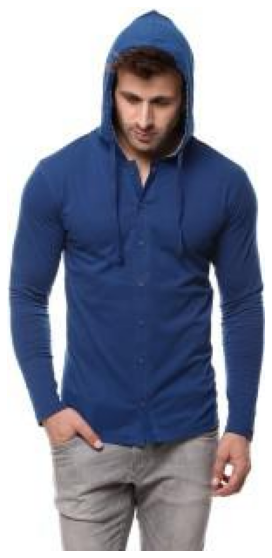

In [28]:
plt.imshow(img)
plt.axis('off')
#HERE IS THE RAW IMAGE WITHOUT ANNOTATIONS....JUZ CHECKING THE IMAGE HERE............

In [29]:
for a in sample['annotation']:
  for label in a['label']:
    w = a['imageWidth']
    h = a['imageHeight']
    points = a['points']
    p1, p2 = points
    x1, y1 = p1['x'] * w, p1['y'] * h
    x2, y2 = p2['x'] * w, p2['y'] * h
    cv2.rectangle(
      img,
      (int(x1), int(y1)),
      (int(x2), int(y2)),
      color=(255, 0, 0),
      thickness=2
    )
    

(-0.5, 147.5, 311.5, -0.5)

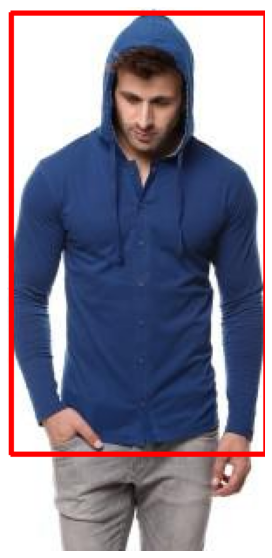

In [30]:
plt.imshow(img)
plt.axis('off')
#HERE IS THE IMAGE WITH ANNOTATIONS.........without labels

In [31]:
for a in sample['annotation']:
  for label in a['label']:
    w = a['imageWidth']
    h = a['imageHeight']
    points = a['points']
    p1, p2 = points
    x1, y1 = p1['x'] * w, p1['y'] * h
    x2, y2 = p2['x'] * w, p2['y'] * h
    cv2.rectangle(
      img,
      (int(x1), int(y1)),
      (int(x2), int(y2)),
      color=(255, 0, 0),
      thickness=2
    )
    ((label_width, label_height), _) = cv2.getTextSize(
        label,
        fontFace=cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.75,
        thickness=2
    )
    cv2.rectangle(
      img,
      (int(x1), int(y1)),
      (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
      color=(0, 0, 255),
      thickness=cv2.FILLED
    )
    cv2.putText(
      img,
      label,
      org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
      fontFace=cv2.FONT_HERSHEY_PLAIN,
      fontScale=1.75,
      color=(255, 255, 255),
      thickness=2
    )

(-0.5, 147.5, 311.5, -0.5)

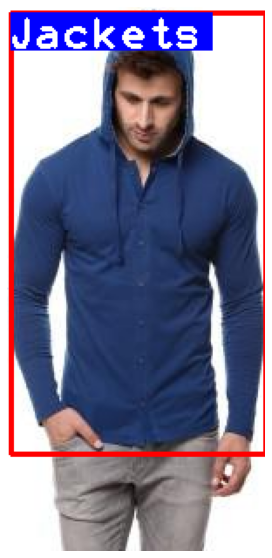

In [32]:
plt.imshow(img)
plt.axis('off')
#HERE IS THE IMAGE WITH ANNOTATIONS.........AND LABELS IN IT DA...

In [33]:
def create_dataset(dataset, categories, dataset_type):

  images_path = Path(f"dataset/images/{dataset_type}")
  images_path.mkdir(parents=True, exist_ok=True)

  labels_path = Path(f"dataset/labels/{dataset_type}")
  labels_path.mkdir(parents=True, exist_ok=True)

  for img_id, row in enumerate(tqdm(dataset)):
    image_name = f"{img_id}.jpeg"
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert("RGB")
    img.save(str(images_path / image_name), "JPEG")

    label_name = f"{img_id}.txt"
    with (labels_path / label_name).open(mode="w") as label_file:
      for a in row['annotation']:
        for label in a['label']:
          category_idx = categories.index(label)

          points = a['points']
          p1, p2 = points
          x1, y1 = p1['x'], p1['y']
          x2, y2 = p2['x'], p2['y']

          bbox_width = x2 - x1
          bbox_height = y2 - y1

          label_file.write(
            f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}\n"
          )

In [35]:
create_dataset(train_data, categories, 'train')
create_dataset(val_data, categories, 'val')

In [ ]:
!sudo apt-get install tree


In [36]:
!tree dataset -L 2

dataset
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories, 0 files


In [ ]:
# One row per object
# Each row is class x_center y_center width height format.
# Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height.
# Class numbers are zero-indexed (start from 0).

In [37]:
# !cat dataset/images/train/0.jpeg
!cat dataset/labels/train/0.txt #HERE CATEGORY VALUE IS 1

1 0.4844155844155844 0.4451097804391218 0.4597402597402598 0.8103792415169662


In [ ]:
##################################################################################################################################################################################################

NOW WE WILL USE THIS CUSTOM DATASET WE PREPARED TO TRAIN OUR YOLOv5 MODEL.....

REFERNCES :

          https://github.com/ultralytics/yolov5      

          https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

In [38]:
!nvidia-smi # FOR THIS U SHOULD CHANGE THE RUNTIME....

Wed Jul  8 21:02:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [39]:

!sudo apt-get install tree -qq > /dev/null

In [40]:
pwd

'/gdrive/My Drive/PyTorch_learnings/Yolov5'

In [8]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy==1.17
!pip install PyYAML==5.3.1
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 20.4MB 1.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


     |████████████████████████████████| 276kB 4.7MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=6fc37af601665bae581a323964cfc303a4bd47fc49cbe2add96f83cd72f9cfbb
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-a7ub5ror
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-a7ub5ror
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266981 sha256=7b8c706799fadc80e8564c933734a6c38e2d978997c8b2f99625fc4dd591d804
  Stored in directory: /tmp/pip-ephem-wheel-cache-2rgrg1o9/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing insta

THIS IS USED TO SPEED UP THE TRAINING PROCESS IT SEEMS.......

https://github.com/NVIDIA/apex


In [5]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

Cloning into 'apex'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 7335 (delta 40), reused 39 (delta 19), pack-reused 7255
Receiving objects: 100% (7335/7335), 13.88 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (4941/4941), done.
Checking out files: 100% (291/291), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-l6imnetg
Created temporary directory: /tmp/pip-req-tracker-sqhjxja0
Created requirements tracker '/tmp/pip-req-tracker-sqhjxja0'
Created temporary directory: /tmp/pip-install-fgr3qkra
Processing /gdrive/My Drive/PyTorch_learnings/Yolov5/apex
  Created temporary directory: /tmp/pip-req-build-cjicprz0
  Added file:///gdrive

In [6]:
pwd

'/gdrive/My Drive/PyTorch_learnings/Yolov5'

In [8]:
ls

 dataset/         'E-commerce Tagging for clothing .json'
 demo_image.jpeg  'Yolo version-5.ipynb'


In [42]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.
/gdrive/My Drive/PyTorch_learnings/Yolov5/yolov5


In [43]:
!gdown --id 1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO -O data/clothing.yaml
!gdown --id 1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i -O models/yolov5x.yaml

Downloading...
From: https://drive.google.com/uc?id=1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO
To: /gdrive/My Drive/PyTorch_learnings/Yolov5/yolov5/data/clothing.yaml
100% 172/172 [00:00<00:00, 307kB/s]
Downloading...
From: https://drive.google.com/uc?id=1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i
To: /gdrive/My Drive/PyTorch_learnings/Yolov5/yolov5/models/yolov5x.yaml
100% 1.58k/1.58k [00:00<00:00, 2.43MB/s]


In [ ]:
# THESE ARE THE CONTENTS OF clothing.yaml file.....SO change the train an dval acc to ur own dataset directory..properly

# train: ../dataset/images/train/
# val: ../dataset/images/val/

# nc: 9

# names: ['Jackets', 'Jeans', 'Shirts', 'Shoes', 'Skirts', 'Tops', 'Trousers', 'Tshirts', 'sunglasses']


In [ ]:
#MAKE SURE YOU ALL THE CELLS ABOVE FIRST TO PREPARE THE DATASET...AND YEAH HERE ...WE ARE GOING TO USE LOAD THE MODEL WITH A PRETRAINED CHECKPOINT.......

In [45]:
!python train.py --img 640 --batch 16 --epochs 40 \
  --data ./data/clothing.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt \
  --name yolov5x_clothing --cache

{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='./data/clothing.yaml', device='', epochs=40, evolve=False, img_size=[640], multi_scale=False, name='yolov5x_clothing', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5x.pt')
Using CUDA Apex device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-07-08 21:11:21.849647: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

                 from  n    params  module             

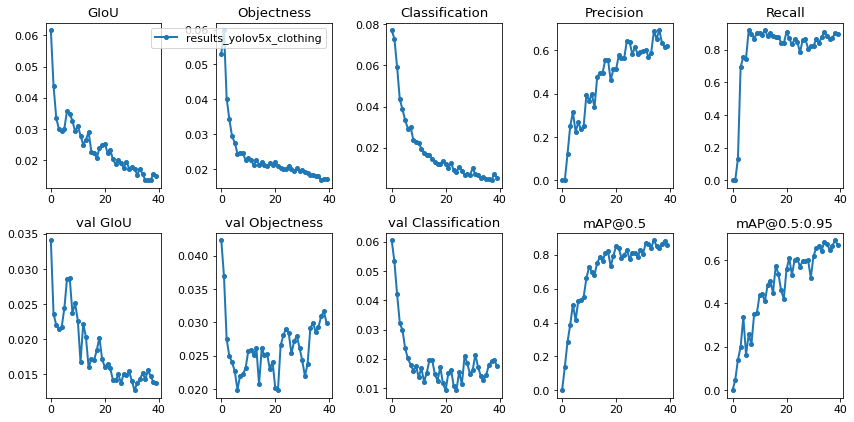

In [46]:
from utils.utils import plot_results

plot_results();


In [48]:
!sudo apt-get install find

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package find


In [51]:
!find ../dataset/images/val/ -maxdepth 1 -type f | head -50 | xargs cp -t "./inference/images/"


In [52]:

!python detect.py --weights weights/best_yolov5x_clothing.pt \
  --img 640 --conf 0.4 --source ./inference/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', update=False, view_img=False, weights=['weights/best_yolov5x_clothing.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Fusing layers... Model Summary: 284 layers, 8.84444e+07 parameters, 8.45317e+07 gradients
image 1/52 inference/images/0.jpeg: 320x640 1 sunglassess, Done. (0.036s)
image 2/52 inference/images/1.jpeg: 640x320 1 Skirtss, Done. (0.035s)
image 3/52 inference/images/10.jpeg: 640x448 1 Tshirtss, Done. (0.038s)
image 4/52 inference/images/11.jpeg: 640x384 1 Jacketss, Done. (0.033s)
image 5/52 inference/images/12.jpeg: 640x256 1 Skirtss, Done. (0.032s)
image 6/52 inference/images/13.jpeg: 640x384 1 Jacketss, Done. (0.033s)
image 7/52 inference/images/14.jpeg: 640x512 Done. (0.037s)
image 8/52 inference/images/15.jpeg: 640x512 1 Tshirtss, Done.

In [53]:
def load_image(img_path: Path, resize=True):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 256), interpolation = cv2.INTER_AREA)
  return img

def show_grid(image_paths):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=11)
  plt.figure(figsize=(24, 12))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

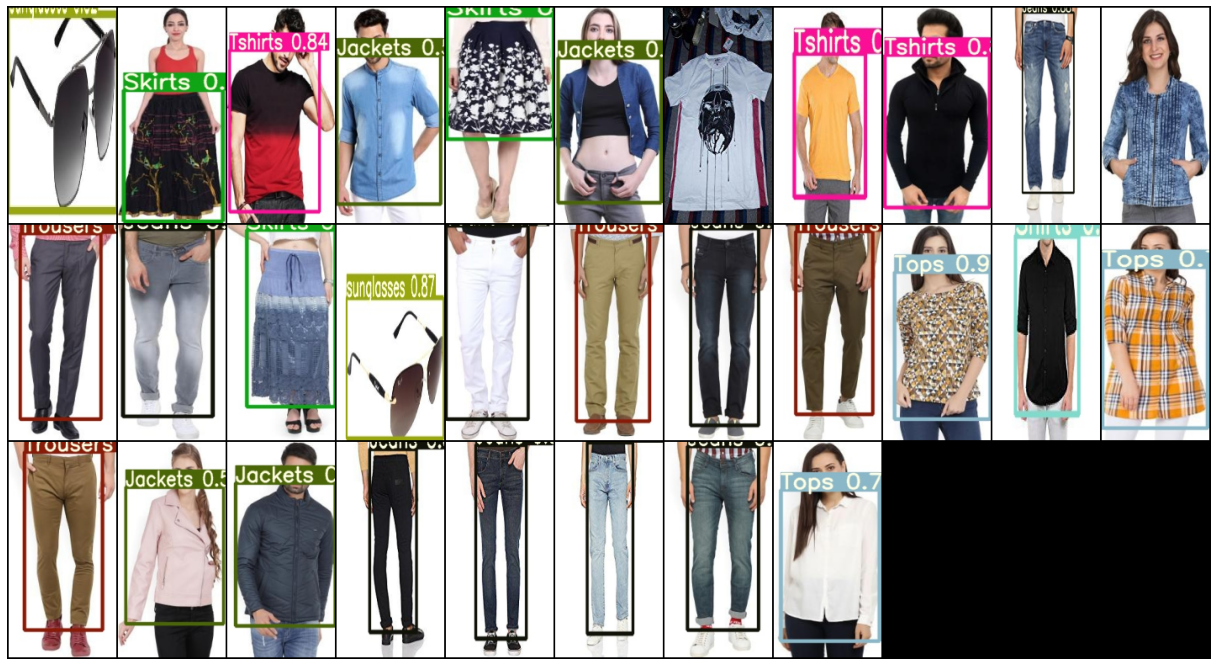

In [58]:
img_paths = list(Path("inference/output").glob("*.jpeg"))[:30]
show_grid(img_paths)